### 1. 对新加入的变量进行分析

In [18]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt
import pdvega
import warnings
warnings.filterwarnings('ignore')

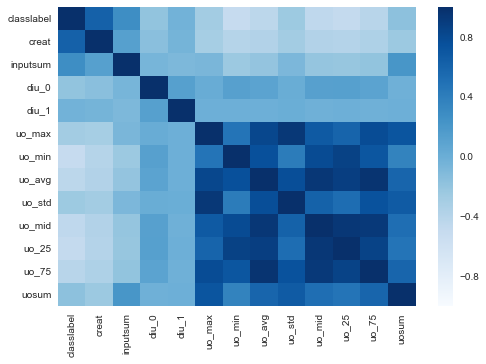

In [66]:
data = pd.read_csv('preprocessed_data.csv')
labelmat = data['classlabel']
datamat = data.drop(['classlabel'],axis=1)
data1 = data[['classlabel','creat','inputsum','diu_0','diu_1','uo_max',
                  'uo_min','uo_avg','uo_std','uo_mid','uo_25',
                  'uo_75','uosum']]
core1 = data1.corr()
sn.heatmap(core1,cmap="Blues")
plt.show()

In [20]:
core1

,classlabel,creat,inputsum,diu_0,diu_1,uo_max,uo_min,uo_avg,uo_std,uo_mid,uo_25,uo_75,uosum
classlabel,1.000000,0.617554,0.276081,-0.194348,-0.037423,-0.274528,-0.496862,-0.429900,-0.245743,-0.457503,-0.484496,-0.407515,-0.168438
creat,0.617554,1.000000,0.126614,-0.150734,-0.047176,-0.297617,-0.392327,-0.371857,-0.277397,-0.370335,-0.385557,-0.351080,-0.241837
inputsum,0.276081,0.126614,1.000000,-0.058023,-0.088947,-0.075507,-0.240247,-0.196234,-0.084874,-0.203405,-0.214113,-0.188428,0.216624
diu_0,-0.194348,-0.150734,-0.058023,1.000000,0.129953,0.023123,0.120312,0.095647,0.011815,0.120574,0.126172,0.097461,-0.022659
diu_1,-0.037423,-0.047176,-0.088947,0.129953,1.000000,-0.008807,-0.009221,-0.015581,0.001490,-0.017170,-0.015540,-0.016746,-0.015086
uo_max,-0.274528,-0.297617,-0.075507,0.023123,-0.008807,1.000000,0.470870,0.822515,0.930023,0.675062,0.595752,0.783454,0.713227
uo_min,-0.496862,-0.392327,-0.240247,0.120312,-0.009221,0.470870,1.000000,0.750312,0.419145,0.796577,0.862081,0.709631,0.365259
uo_avg,-0.429900,-0.371857,-0.196234,0.095647,-0.015581,0.822515,0.750312,1.000000,0.767247,0.944357,0.888787,0.968666,0.593733
uo_std,-0.245743,-0.277397,-0.084874,0.011815,0.001490,0.930023,0.419145,0.767247,1.000000,0.611220,0.527647,0.740471,0.670418
uo_mid,-0.457503,-0.370335,-0.203405,0.120574,-0.017170,0.675062,0.796577,0.944357,0.611220,1.000000,0.940380,0.926949,0.519844


In [23]:
from sklearn.feature_selection import VarianceThreshold
sel_var = VarianceThreshold()
data_var = sel_var.fit_transform(datamat)
data_var
result = sel_var.get_support(indices=False)
eigens = ['creat', 'hr_max', 'hr_min', 'hr_avg', 'hr_std', 'hr_mid',
            'hr_25', 'hr_75', 'rr_max', 'rr_min', 'rr_avg', 'rr_std',
            'rr_mid', 'rr_25', 'rr_75', 'sbp_max', 'sbp_min', 'sbp_avg',
            'sbp_std', 'sbp_mid', 'sbp_25', 'sbp_75', 'dbp_max', 'dbp_min',
            'dbp_avg', 'dbp_std', 'dbp_mid', 'dbp_25', 'dbp_75', 'mbp_max',
            'mbp_min', 'mbp_avg', 'mbp_std', 'mbp_mid', 'mbp_25', 'mbp_75',
            'si_max', 'si_min', 'si_avg', 'si_std', 'si_mid', 'si_25', 'si_75',
            'spo2_max', 'spo2_min', 'spo2_avg', 'spo2_std', 'spo2_mid', 'spo2_25',
            'spo2_75', 'tem_max', 'tem_min', 'tem_avg', 'tem_std', 'tem_mid', 'tem_25',
            'tem_75', 'uo_max', 'uo_min', 'uo_avg', 'uo_std', 'uo_mid', 'uo_25', 'uo_75',
            'uosum', 'gcs_max', 'gcs_min', 'gcs_avg', 'gcs_std', 'gcs_mid', 'gcs_25', 'gcs_75',
            'age', 'lostime', 'inputsum','type_0','type_1','type_2',
            'F', 'M', 'vaso_0', 'vaso_1', 'vent_0', 'vent_1', 'bmi_0', 'bmi_1','diu_0', 'diu_1','BMI']
# dataframe = pd.DataFrame(result.reshape(1,90),columns=eigens)
dataframe = pd.DataFrame(eigens)
dataframe[~result]

,0


### 2.Python做 K-S检验

In [31]:
from scipy.stats import ks_2samp
import numpy as np

data1 = data.loc[data['classlabel']==1,:]
data2 = data.loc[data['classlabel']==0,:]
datamat1 = data1.drop(['classlabel'],axis=1)
datamat2 = data2.drop(['classlabel'],axis=1)

n_features = datamat1.shape[1]
test = []
for i in range(n_features):
    test_tmp = ks_2samp(datamat1.iloc[:,i],datamat2.iloc[:,i])
    test.append(test_tmp.pvalue)
pvalues = np.array(test)

dis_P = pvalues[pvalues>=0.05]
eigens = np.array(eigens)
keys = eigens[pvalues>=0.05]
discard = pd.DataFrame(dis_P.reshape(1,5),columns=keys)
discard



,hr_min,rr_75,mbp_std,spo2_25,F
0,0.223389,0.14108,0.055973,0.08567,1.0


### 去掉假设检验不通过的项,以及肌酐

In [68]:
datamat.drop(['creat','hr_min','rr_75','mbp_std','spo2_25','F'],axis=1, inplace=True)

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc,step=1,cv=StratifiedKFold(10),scoring="accuracy")
rfecv.fit(datamat,labelmat)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [57]:
rfecv.n_features_

52

In [58]:
keys = datamat.keys()
keys[rfecv.support_]

Index(['hr_max', 'hr_std', 'hr_mid', 'hr_25', 'hr_75', 'rr_avg', 'rr_std',
       'rr_mid', 'rr_25', 'sbp_max', 'sbp_min', 'sbp_std', 'sbp_mid', 'sbp_25',
       'sbp_75', 'dbp_avg', 'dbp_std', 'mbp_min', 'mbp_25', 'mbp_75', 'si_max',
       'si_avg', 'si_25', 'spo2_max', 'spo2_min', 'spo2_avg', 'spo2_std',
       'spo2_mid', 'spo2_75', 'tem_max', 'tem_min', 'tem_avg', 'tem_std',
       'tem_25', 'tem_75', 'uo_max', 'uo_min', 'uo_avg', 'uo_std', 'uo_mid',
       'uo_25', 'uosum', 'gcs_min', 'gcs_avg', 'lostime', 'inputsum', 'type_0',
       'type_2', 'M', 'vaso_1', 'bmi_1', 'diu_0'],
      dtype='object')

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
ada = AdaBoostClassifier(n_estimators=100)
rfecv = RFECV(estimator=ada,step=1,cv=StratifiedKFold(2),scoring="accuracy")
rfecv.fit(datamat,labelmat)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [53]:
rfecv.n_features_

24

In [55]:
keys = datamat.keys()
keys[rfecv.support_]

Index(['hr_std', 'rr_std', 'sbp_max', 'sbp_avg', 'sbp_std', 'sbp_25', 'sbp_75',
       'dbp_min', 'dbp_std', 'dbp_75', 'si_max', 'si_min', 'spo2_std',
       'tem_min', 'tem_mid', 'tem_25', 'uo_min', 'uo_25', 'uo_75', 'uosum',
       'age', 'lostime', 'inputsum', 'type_0'],
      dtype='object')

In [90]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif, chi2
slf = SelectKBest(chi2,k=5)
slf.fit(datamat,labelmat)

SelectKBest(k=5, score_func=<function chi2 at 0x0000023523C95620>)

In [89]:
slf.fit(datamat,labelmat)

SelectKBest(k=5, score_func=<function chi2 at 0x0000023523C95620>)